In [1]:
import scipy as sp

web_traffic_data= sp.genfromtxt('web_traffic.tsv')
print(web_traffic_data.shape)
x = web_traffic_data[:,0]  # hours
y = web_traffic_data[:,1]  # number of web hits 

(743, 2)


In [2]:
print(sp.sum(sp.isnan(y)))# y is still contain null values which nan
x= x[~sp.isnan(y)]  # using ~ to negate the values contains nan values
y = y[~sp.isnan(y)] 

8


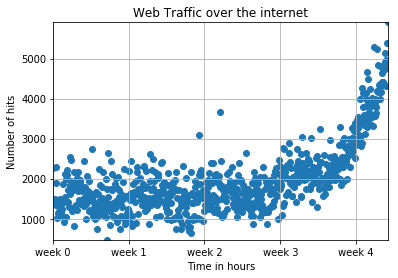

In [7]:
# Plotting Using Matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title('Web Traffic over the internet')
plt.xlabel('Time in hours')
plt.ylabel('Number of hits')
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [4]:
def error_calculated(f,x,y):
    return sp.sum((f(x)-y)**2)

In [5]:
# considering the model as straight line, and find how to best fit the line in the chart
# we can achieved that using Scipy's ployfit()

fp1, residuals, rank, sv, rcond = sp.polyfit(x,y,1,full=True)
print("Model parameters" ,fp1)
print(residuals)

Model parameters [  2.59619213 989.02487106]
[3.17389767e+08]


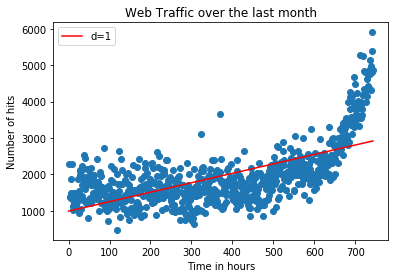

In [6]:
f1 = sp.poly1d(fp1)
# print(error_calculated(f1,x,y))

fx = sp.linspace(0,x[-1], 1000) # generating x values for plotting
plt.scatter(x,y)
plt.plot(fx,f1(fx),'r')
plt.title('Web Traffic over the last month')
plt.xlabel('Time in hours')
plt.ylabel('Number of hits')
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()